In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import networkx as nx
import pickle 
import scipy
from matplotlib import pylab as plt


In [8]:
import geopandas as gpd
import numpy as np
import sys
from matplotlib import pylab as plt


sys.path.append('/home/carlos/repos/commuters/functions')
from return_g_estado import *

# brasil_map = gpd.read_file('BR_UF_2021/BR_UF_2021.shp')

def map_sh(path_map):
    try:
        return gpd.read_file(path_map)
    except TypeError:
        raise TypeError
def return_net_graph(estado: str, path_map_1: str, scale: int =100, with_labels:bool=True) -> None:
    """Plot network graph with map 
    Using city as nodes and edges as the link between source city to the target city
    Parameters
    ----------

    """
    map_sh_readed = map_sh(path_map_1)
    g_ = return_g_estado(estado)
    pos_nx = {}
    name_nx = {}
    # Take each zip code from data info and make a position based on longitude and latitude 
    for zip_code in list(g_.nodes()):
        pos_nx['CODE'] = tuple(info[info.CODE==zip_code][['LON','LAT']].values[0])
        name_nx['CITY'] = info[info.CODE==zip_code].CITY.values[0]
        

    f, ax = plt.subplots(figsize=(10*2,7*2))
    map_sh_readed[map_sh_readed.SIGLA==estado].plot(ax=ax, color='#bdbdbd')
    
    # Make a network draw using networkx using the return_g_estado function 
    nx.draw_networkx(g_,
                    pos=pos_nx,
                    node_size=(scale*np.asarray(list(dict(g_.degree()).values()))).tolist(), #(50*np.asarray(dict(g_.degree()).values())+30).tolist(),
                    labels=name_nx,
                    node_color='#af8dc3',
                    edge_color='#404040',
                    alpha=1,
                    width=2,
                    style='dotted',
                    font_size=12,
                    font_color='#202020',
                    with_labels=with_labels,
                    ax=ax)
    ax.axis('off')
   

In [34]:
edges = pd.read_csv('data/br_commuters.csv')
info = pd.read_csv('data/br_info.csv')

In [35]:
def return_g_estado(estado: ndarray) -> subgraph: 
    """Returns the subgraph induced on nodes
    """
    df_ = edges[edges.source.isin(info[info.STATE==estado].CODE.unique()) & edges.target.isin(info[info.STATE==estado].CODE.unique())]
    g_ =  nx.from_pandas_edgelist(df=df_, edge_attr='weight')
    
    
    Gcc = sorted(nx.connected_components(g_), key=len, reverse=True)
    gg_ = g_.subgraph(Gcc[0])
    return gg_

In [62]:
g_ = return_g_estado('SP')
pos_nx = {}
name_nx = {}
for zip_code in list(g_.nodes()):
    pos_nx[zip_code] = tuple(info[info.CODE==zip_code][['LON','LAT']].values[0])
    name_nx[zip_code] = info[info.CODE==zip_code].CITY.values[0]

In [66]:
name_nx.keys() == pos_nx.keys()

True

In [43]:
for zip_code in list(g_.nodes()):
    print(tuple(info[info.CODE==zip_code][['LON','LAT']].values[0]))

(-50.312526582882, -23.3004940371229)
(-50.2264075987152, -23.0517516546543)
(-50.3718730229324, -23.0924805)
(-50.0775707225535, -23.04126648)
(-50.1906662735549, -23.849821485)
(-49.9785725343256, -23.160116475)
(-50.3580609524608, -23.4082575022835)
(-50.4234587703804, -23.2681573189206)
(-50.0773459027438, -23.2970488330377)
(-48.9917545384254, -24.6616897054529)
(-49.2603168259064, -24.818947302786)
(-49.2274379772727, -25.2943402945361)
(-49.2718478850774, -25.432956)
(-48.3260489326164, -25.3004374743932)
(-49.0860587993652, -24.9723811901187)
(-49.3387018845931, -25.9906180905957)
(-49.5288414503356, -25.4594905)
(-49.3232931947119, -25.6414002186938)
(-49.3227825970264, -25.7596206130936)
(-49.4282437421995, -26.0969563765535)
(-49.4966829869198, -25.8683083492793)
(-49.2000824656673, -25.537702)
(-49.1822439412764, -25.9201804801753)
(-49.3003198184039, -25.3133776022763)
(-48.7129000617478, -25.4301661323239)
(-49.4019396967087, -25.591645)
(-49.0534658723572, -25.303247505)

In [24]:
pos_nx

{'CODE': (-47.9272169634722, -24.3886037821879)}

NetworkXError: Node 3500105 has no position.

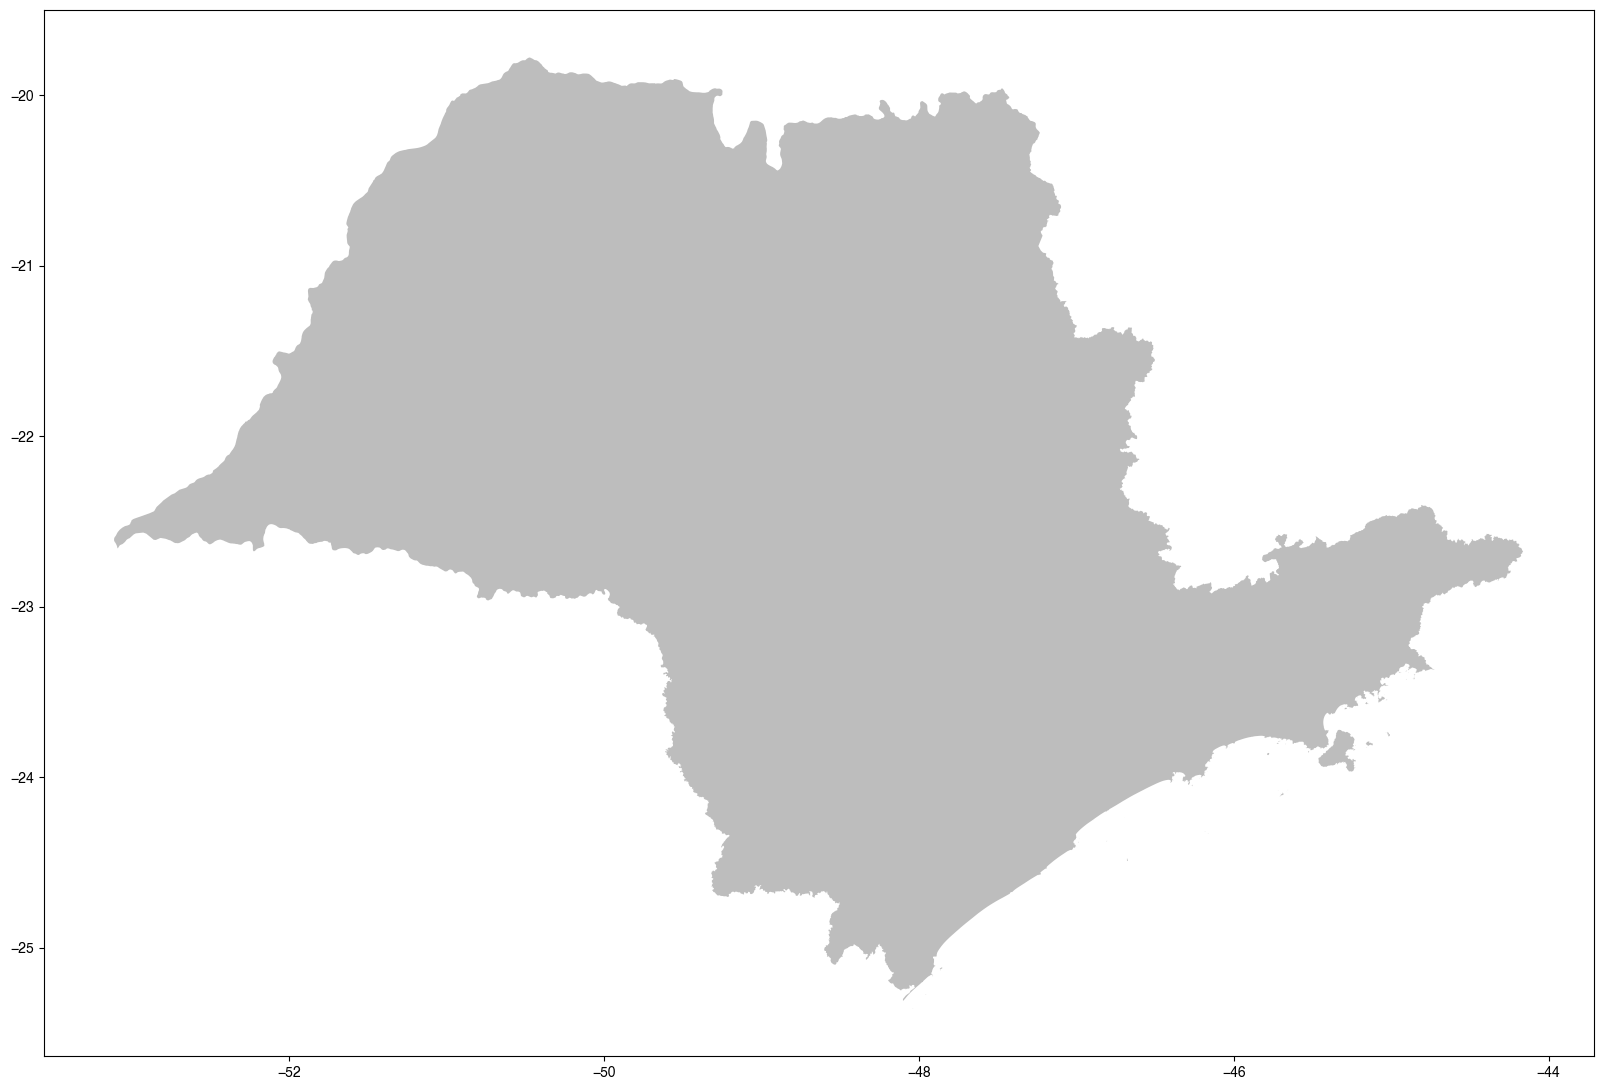

In [3]:
return_net_graph('SP', '/home/carlos/repos/commuters/BR_UF_2021/BR_UF_2021.shp', scale=2, with_labels=False)